<a href="https://colab.research.google.com/github/justbeingdk/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [7]:
uploaded=files.upload()

Saving bankss.xlsx to bankss (1).xlsx


In [10]:
data = pd.read_excel('bankss.xlsx')
print(data.head())



   age          job  marital  education  default  balance  housing  loan  \
0   59  blue-collar  married  secondary        0        0        1     0   
1   55  blue-collar  married    primary        0      627        1     0   
2   26  blue-collar  married    primary        0        0        1     0   
3   36  blue-collar  married  secondary        0        0        1     0   
4   37  blue-collar  married    primary        0        0        1     0   

  contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unk0wn    5   may       226         1     -1         0   unk0wn  0  
1  unk0wn    5   may       247         1     -1         0   unk0wn  0  
2  unk0wn   21   may       425         1     -1         0   unk0wn  0  
3  unk0wn    6   may       337         1     -1         0   unk0wn  0  
4  unk0wn   26   may        24         1     -1         0   unk0wn  0  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = data.drop(['contact', 'day','month','housing','campaign','poutcome','default','balance','loan','pdays','contact','job','marital','education','previous',], axis=1)

le = LabelEncoder()
data['encoded_target'] = le.fit_transform(data['y'])

X = data.drop('encoded_target', axis=1)
y = data['encoded_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       103

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       802
           1       1.00      1.00      1.00       103

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



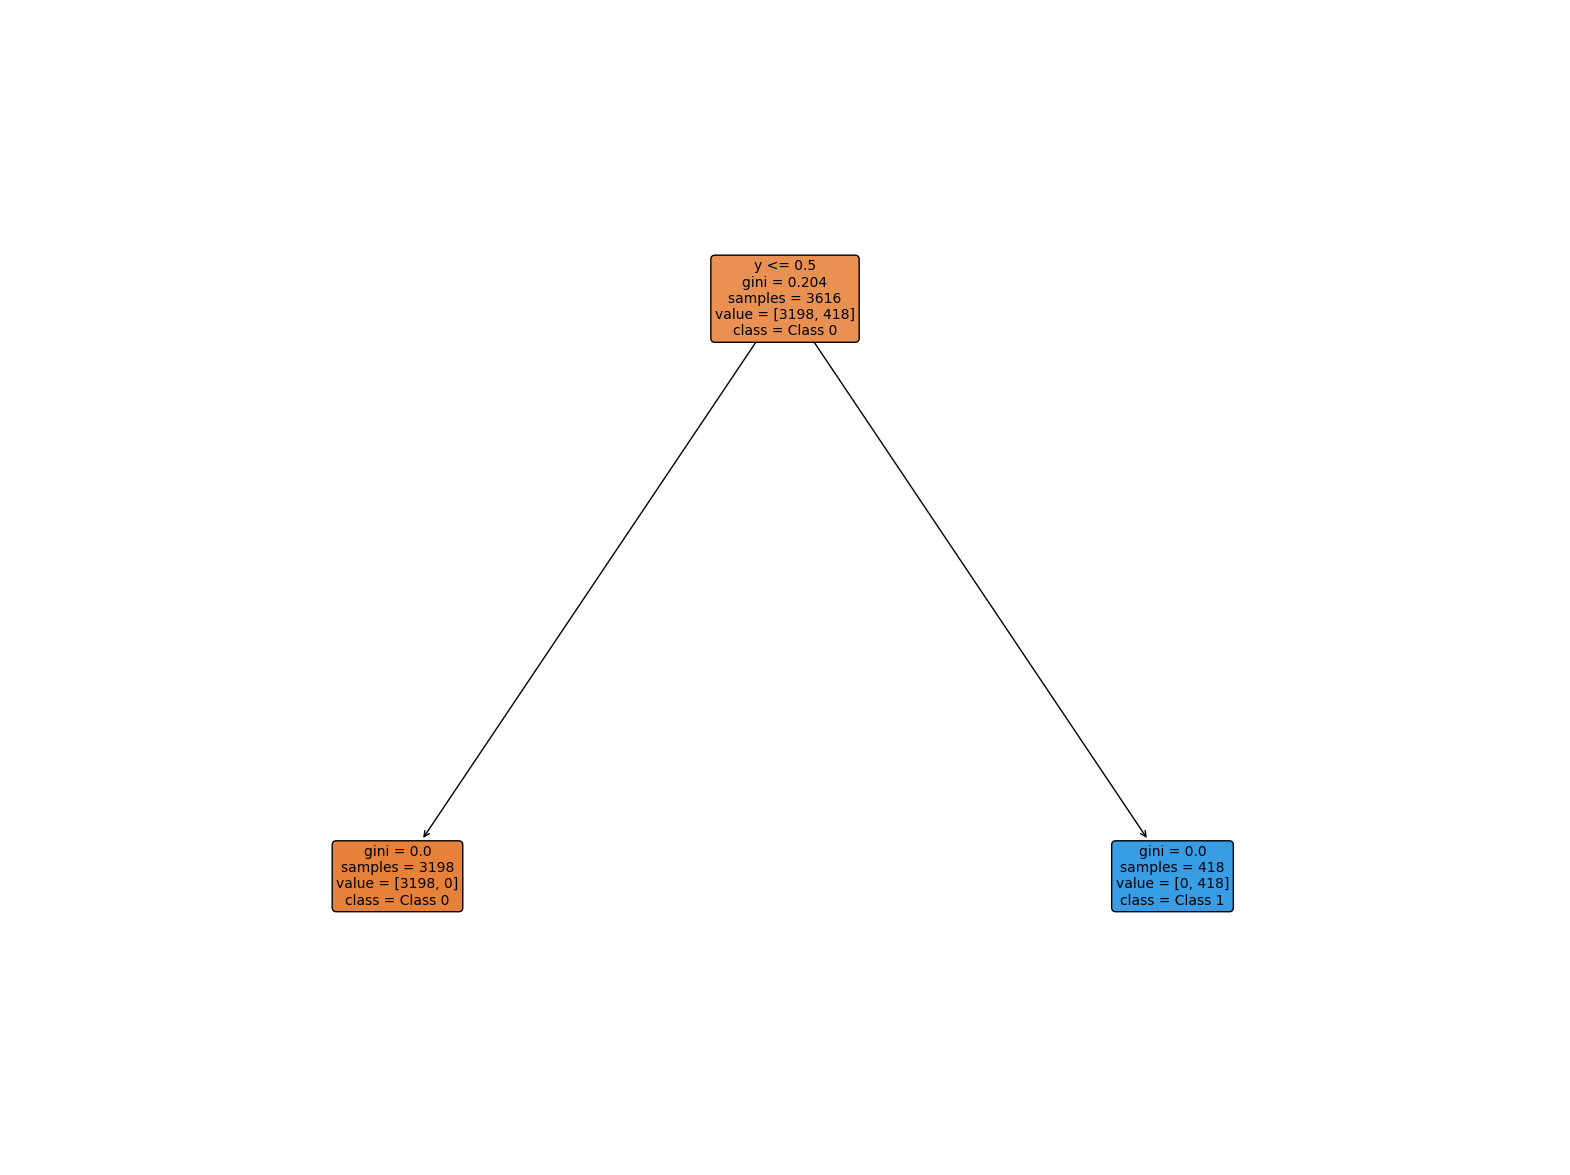

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Set the figure size
plt.figure(figsize=(20, 15))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True, fontsize=10)

# Display the plot
plt.show()
